## Instructions

Please make a copy and rename it with your name (ex: Proj6_Ilmi_Yoon). All grading points should be explored in the notebook but some can be done in a separate pdf file. 

*Graded questions will be listed with "Q:" followed by the corresponding points.* 

You will be submitting **a pdf** file containing **the url of your own proj6.**


---

In [ ]:
#import python packages

import numpy as np
import scipy as sp
import scipy.stats as st
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
rng=np.random.RandomState(1234)

In [ ]:
#simulate a normal distribution 
MEAN=527
SD=112
N_POPULATION=100000
N_SAMPLE=1000

population=rng.normal(loc=MEAN, 
                            scale=SD, 
                            size=N_POPULATION)
our_sample=population[0:N_SAMPLE]


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


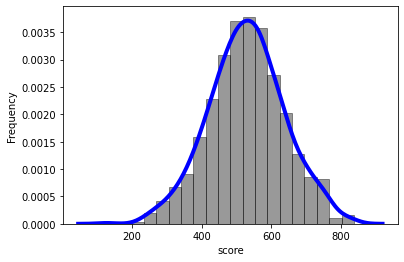

In [ ]:


fig,plots=plt.subplots(1)
sns.distplot(our_sample, hist=True, kde=True, 
             bins=20,
              color = 'blue', 
             hist_kws={'edgecolor':'black','color':'black'},
             kde_kws={'linewidth': 4},ax=plots)
plots.set_xlabel('score')
plots.set_ylabel('Frequency')
plt.show()



Working with distributions
===

We'll work with GMAT scores, which follow a normal distribution with mean 527 and SD 112.



Typically 2 questions:
- What is the fraction of datapoints in a range? 
  - e.g. What fraction of test scores fall between 400 and 500?
  - scores => density
- Opposite direction: what is the data range that captures a given fraction of the data?
  - e.g. What score do you need to be in the 5% percentile?
  - density => scores

In [ ]:
def score2density(min_value,max_value,all_values,range_vs_outside='range',
              plot=True,
              xlabel='Please set an x-label :)'):
  num_in_range=0
  for i in range(len(list(all_values))):
    value=all_values[i]
    if value>=min_value and value<max_value:
      if range_vs_outside=='range':
        num_in_range+=1
    else:
      if range_vs_outside=='outside_range':
        num_in_range+=1
  
  if plot:
    fig,plots=plt.subplots(1)
    sns.distplot(all_values, hist=True, kde=True, 
                color = 'black', 
                hist_kws={'edgecolor':'lightgray','color':'lightgray'},
                kde_kws={'linewidth': 4},ax=plots)

    plots.set_xlabel(xlabel,fontsize=15)
    plots.set_ylabel('Density',fontsize=15)
    x = plots.lines[-1].get_xdata()
    y = plots.lines[-1].get_ydata()
    if range_vs_outside=='range':
      plots.fill_between(x, 0, y, where=(x >= min_value) & (x < max_value), color='gold')
    else:
      plots.fill_between(x, 0, y, where=(x < min_value) | (x > max_value), color='gold')
    plots.axvline(x=min_value,color='black',linestyle='--')
    plots.axvline(x=max_value,color='black',linestyle='--')
    plt.show()

  if range_vs_outside=='range':
    return(str(1.0*num_in_range/len(all_values))+' fraction of data points fall in ['+str(min_value)+','+str(max_value)+')')
  if range_vs_outside=='outside_range':
    return(str(1.0*num_in_range/len(all_values))+' fraction of data points fall outside ['+str(min_value)+','+str(max_value)+')')

  

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


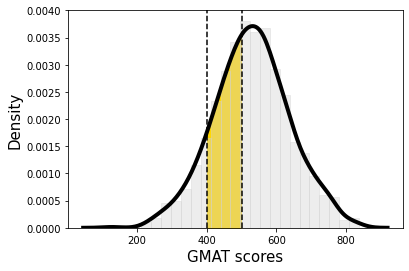

'0.275 fraction of data points fall in [400,500)'

In [ ]:
score2density(min_value=400,
                           max_value=500,
                           all_values=our_sample,
                           xlabel='GMAT scores',
              range_vs_outside='range')


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


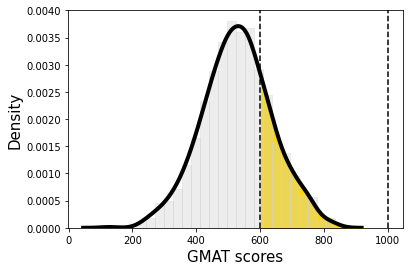

'0.254 fraction of data points fall in [600,1000)'

In [ ]:
#what fraction of values > 600
score2density(min_value=600,
                           max_value=1000,
                           all_values=our_sample,
                           xlabel='GMAT scores')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


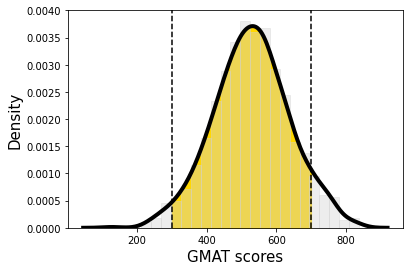

0.06499999999999995

In [ ]:
#fraction of values less than 300 or more than 700
score2density(min_value=300,
                           max_value=700,
                           all_values=our_sample,
                           xlabel='GMAT scores')
1-0.935

In [ ]:

def density2score(all_values,bottom_quantile=0,top_quantile=1,
              plot=True,
                     xlabel='Please set an x-label :)'):

  top_value=np.quantile(all_values,top_quantile)
  bottom_value=np.quantile(all_values,bottom_quantile)

  if plot:

    fig,plots=plt.subplots(1)
    sns.distplot(all_values, hist=True, kde=True, 
                color = 'black', 
                hist_kws={'edgecolor':'lightgray','color':'lightgray'},
                kde_kws={'linewidth': 4},ax=plots)

    plots.set_xlabel(xlabel,fontsize=15)
    plots.set_ylabel('Density',fontsize=15)
    x = plots.lines[-1].get_xdata()
    y = plots.lines[-1].get_ydata()
    plots.fill_between(x, 0, y, where=(x >= bottom_value) & (x < top_value), color='gray')
    plots.axvline(x=bottom_value,color='gold',linestyle='--')
    plots.axvline(x=top_value,color='gold',linestyle='--')
    plt.show()
  return('Scores covering the quantiles '+str(bottom_quantile)+' to '+str(top_quantile)+' are '+str(bottom_value)+ ' '+str(top_value))

  


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


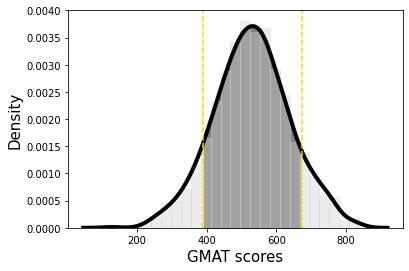

'Scores covering the quantiles 0.1 to 0.9 are 390.18412842542233 672.6423323122425'

In [ ]:
density2score(our_sample,bottom_quantile=0.1,top_quantile=0.9,xlabel='GMAT scores')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


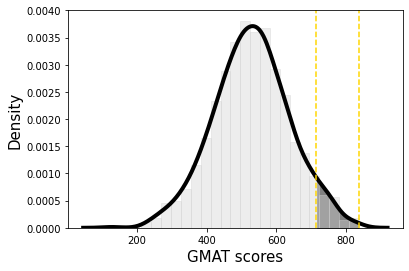

'Scores covering the quantiles 0.95 to 1 are 714.8630992928165 836.5505369431514'

In [ ]:
density2score(our_sample,bottom_quantile=0.95,top_quantile=1,xlabel='GMAT scores')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


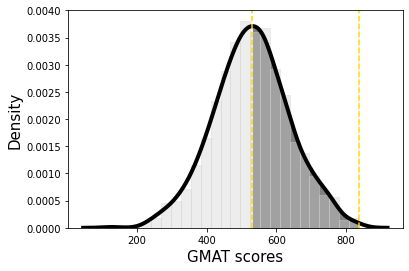

'Scores covering the quantiles 0.5 to 1 are 528.9892199483011 836.5505369431514'

In [ ]:
#top  50% quantile = 50% to 100% of the scores
density2score(our_sample,bottom_quantile=0.5,top_quantile=1,xlabel='GMAT scores')


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


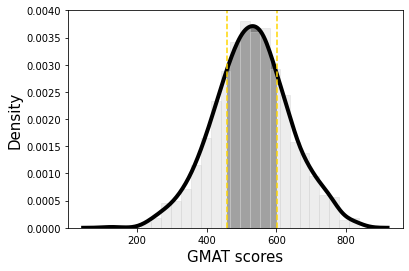

'Scores covering the quantiles 0.25 to 0.75 are 457.0762054251187 601.9062859674676'

In [ ]:
#low and high ends of the middle 50%
#0.25<->0.75
density2score(our_sample,bottom_quantile=0.25,top_quantile=0.75,xlabel='GMAT scores')


Confidence intervals
====

We took a sample and want to talk about what we think the true mean of the population is.

**"LIFE IS EASY" case**
You hire someone to estimate for you the distribution of the true mean.

They bring you this:

In [ ]:
#very expensive work you paid them to do
#========================================

TRUE_MEAN=MEAN #this is the mean we used when generating the data
SEM=np.std(our_sample)/np.sqrt(our_sample.shape[0])

#they give you this distribution
distribution_of_means=np.random.normal(loc=TRUE_MEAN, 
                            scale=SEM, 
                            size=1000)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


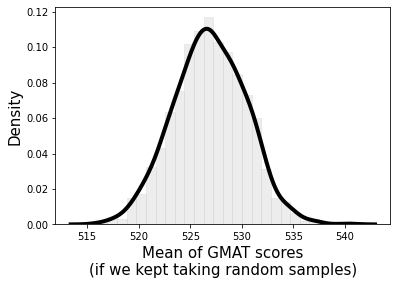

In [ ]:
#you plot the distribution
xlabel='Mean of GMAT scores\n(if we kept taking random samples)'
fig,plots=plt.subplots(1)
sns.distplot(distribution_of_means, hist=True, kde=True, 
                color = 'black', 
                hist_kws={'edgecolor':'lightgray','color':'lightgray'},
                kde_kws={'linewidth': 4},
             ax=plots)

plots.set_xlabel(xlabel,fontsize=15)
plots.set_ylabel('Density',fontsize=15)

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


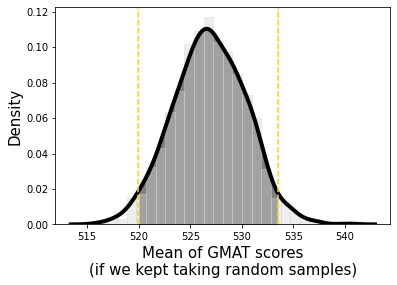

'Scores covering the quantiles 0.025 to 0.975 are 519.9599344636781 533.5145923318754'

In [ ]:
#to create the confidence interval, all you do is ask to get the values at the relevant quantiles
#for example, for a 95% CI, get the values from 2.5% to 97.5%
density2score(distribution_of_means,bottom_quantile=0.025,top_quantile=0.975,xlabel='Mean of GMAT scores\n(if we kept taking random samples)')

In [ ]:
#what is the interval for a 90% CI?
#What about 99%?

#what if we changed the sample size to 10? To 10000?
#What is the 95% CI?

N_SAMPLE=10
our_sample=population[0:N_SAMPLE]

**Real life**

In the real life, you don't know the distribution of the mean.
You know it's normal most of the time, and you know how to compute its standard deviation (SEM).



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(500.0, 550.0)

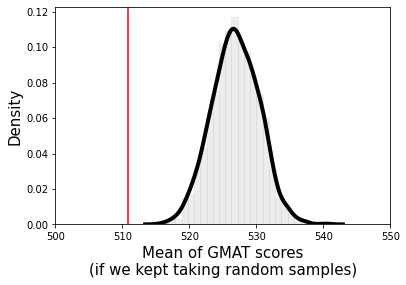

In [ ]:
#you plot the distribution of the mean
xlabel='Mean of GMAT scores\n(if we kept taking random samples)'
fig,plots=plt.subplots(1)
sns.distplot(distribution_of_means, hist=True, kde=True, 
                color = 'black', 
                hist_kws={'edgecolor':'lightgray','color':'lightgray'},
                kde_kws={'linewidth': 4},
             ax=plots)

plots.set_xlabel(xlabel,fontsize=15)
plots.set_ylabel('Density',fontsize=15)

#then you plot your sample mean
plots.axvline(x=np.mean(our_sample),color='red',linestyle='-')
plots.set_xlim(500,550)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


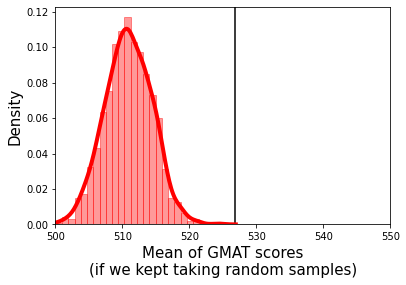

In [ ]:
#center the distribution of the mean on your sample mean instead
xlabel='Mean of GMAT scores\n(if we kept taking random samples)'
fig,plots=plt.subplots(1)


plots.set_xlabel(xlabel,fontsize=15)
plots.set_ylabel('Density',fontsize=15)

#you look how it compares to the true mean
plots.axvline(x=np.mean(distribution_of_means),color='black',linestyle='-')
sns.distplot(distribution_of_means-np.mean(np.mean(distribution_of_means))+np.mean(np.mean(our_sample)), 
             hist=True, kde=True, 
                color = 'red', 
                hist_kws={'edgecolor':'red','color':'red'},
                kde_kws={'linewidth': 4},
             ax=plots)
plots.set_xlim(500,550)

plt.show()

One-sample t-test practice
==

With a one-sample t-test, we are asking whether a predefined value, m0 is in the confidence interval for the mean.

Today, we'll reframe this test.

This will involve the following:
- we will think of the value of t as a test statistic, computed as ```
(sample_mean-mu0)/(sample_sd/np.sqrt(n))
```
- we will look at the distribution of the test statistic under the null hypothesis
- we will compute the number of times we would see a test statistic as or more extreme than the one we've seen. That will be called the p-value

The p-value is the complement of the confidence interval, e.g. for if a value is not in 95% confidence interval, then its pvalue is < 0.05.

We will continue with the example of GMAT scores, with mean 527 and SD 112. We will ask whether the true mean score is 525.

In [ ]:
#generate dataset
#================
MEAN=527
SD=112
N_POPULATION=100000
N_SAMPLE=1000

mu0=525

population=np.random.normal(loc=MEAN, 
                            scale=SD, 
                            size=N_POPULATION)
our_sample=population[0:N_SAMPLE]
#==================


#one-sample t-test
#=================
sample_mean=np.mean(our_sample)
sample_sd=np.sqrt(np.var(our_sample, ddof=1)) #ddof makes this the unbiased, rather than biased sample sd
n=our_sample.shape[0]
df=n-1

our_t=(sample_mean-mu0)/(sample_sd/np.sqrt(n))
print(our_t)

0.37554933863799767


In [ ]:
#simulate a t-distribution with degrees of freedom n-1
our_t_dist=np.random.standard_t(df, size=10000)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


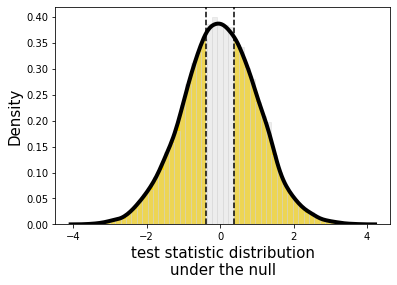

'0.7095 fraction of data points fall outside [-0.37554933863799767,0.37554933863799767)'

In [ ]:
#use score2density to get the fraction of times we get a t-statistic more extreme than the one we got
score2density(min_value=-np.abs(our_t),max_value=np.abs(our_t),
              all_values=our_t_dist,xlabel='test statistic distribution\nunder the null',
              range_vs_outside='outside_range')

In [ ]:
#we can also get the same result using the function ttest_1samp
from scipy.stats import ttest_1samp
ttest_1samp(our_sample,mu0)

Ttest_1sampResult(statistic=0.37554933863799767, pvalue=0.7073316850256143)


Summary
--

Our null hypothesis was that the population mean was equal to 525.

We computed the test statistic for the one-sample t-test as:

```
(sample_mean-mu0)/(sample_sd/np.sqrt(n))
```
We then went to a t-distribution with degrees of freedom `n-1`. That is the distribution of our test statistic **if the null hypothesis were true**.

We computed a p-value, or the number of times we would get such an extreme test statistic if the null hypothesis were true. We did this by running our trusty old `score2density` function.

Finally, we compared the p-value with our significance threshold of 0.05.

We concluded that we could not reject the null hypothesis.

Note that getting a p-value higher than 0.05 means that the value from the null hypothesis was in the 95% confidence interval. The probability density function is made of the confidence interval and the p-value that complement each other.


**Another example**

Values from https://www.stat.colostate.edu/inmem/gumina/st201/recitation8/downloads/Normal%20Probabilites%20Practice.pdf

The length of human pregnancies has a population mean of 266 days, and sd 16.

Let's take a sample from a higher-risk set of individuals with mean 257 days, sd 16, and see if there is a significant difference.

- compute the sample mean
- compute the sample SD
- compute the degrees of freedom
- compute the test statistic
- compute a p-value by comparing with the distribution of the test statistic under the null (i.e. a t-distribution with degrees of freedom as computed earlier)
- compare the p-value to a 0.05 significance threshold
- can we reject the null hypothesis?



In [ ]:
MEAN=257
SD=16
N_SAMPLE=10

our_sample=np.random.normal(loc=MEAN, 
                            scale=SD, 
                            size=N_SAMPLE)

mu0=266

sample_mean=np.mean(our_sample)
sample_sd=np.sqrt(np.var(our_sample, ddof=1)) #ddof makes this the unbiased, rather than biased sample sd
n=our_sample.shape[0]
df=n-1

our_t=#?????????,


SyntaxError: ignored

In [ ]:
#use score2density to get the fraction of times we get a t-statistic more extreme than the one we got
score2density(min_value=#?????????,
              max_value=#?????????,
              all_values=our_t_dist,xlabel='test statistic distribution\nunder the null',
              range_vs_outside='outside_range',
              )

Two-sample t-test
--

The procedure will be very similar to what we did above.

The only thing that changes is the formula for the test statistic. It will now need to include the standard deviation in both groups (compared to the one-sample t-test, where we only had 1 group with data).

**Is exercise associated with lower baseline blood pressure?**

We will simulate data with:
- control mean 120 mmHg
- treatment mean 116 mmHg 
- population sd 5 for both conditions

In [ ]:
#simulate dataset
#=====================

def sample_condition_values(condition_mean,
                           condition_var,
                       condition_N,
                       condition='',
                       variable_name=''):
    
  condition_values=np.random.normal(loc = condition_mean, 
                                    scale=condition_var,
                                    size = condition_N)

  data_condition_here=pd.DataFrame({variable_name:condition_values,
                   'condition':condition})
  return(data_condition_here)

def get_data(N_per_condition,
             ctrl_mean,
             treat_mean,
             sd,
             treat_name='treatment',
             ctrl_name='control',
             variable_name=''):
  np.random.seed(1)

  data_ctrl=sample_condition_values(condition_mean=ctrl_mean,
                        condition_N=N_per_condition,
                        condition_var=np.power(sd,2),
                        condition=ctrl_name,
                        variable_name=variable_name)

  data_treat=sample_condition_values(condition_mean=treat_mean,
                        condition_N=N_per_condition,
                        condition_var=np.power(sd,2),
                        condition=treat_name,
                        variable_name=variable_name)

  data=pd.concat([data_ctrl,data_treat],axis=0)
  return(data)


N_per_condition=10
ctrl_mean=120
treat_mean=116 
sd=2.5
treat_name='exercise'
ctrl_name='couch'
variable_name='BP'

data=get_data(N_per_condition=N_per_condition,
             ctrl_mean=ctrl_mean,
             treat_mean=treat_mean,
             sd=sd,
             treat_name=treat_name,
             ctrl_name=ctrl_name,
              variable_name=variable_name)



In [ ]:
#visualize data
#=====================

#strip plot
sns.catplot(data=data,x='condition',y='BP',
            jitter=1,
            )
plt.show()

In [ ]:
#boxplot
sns.catplot(data=data,x='condition',y='BP',kind='box',)
plt.show()

In [ ]:
#violin plot
sns.catplot(data=data,x='condition',y='BP',kind='violin',)
plt.show()

In [ ]:
#boxplot with points on top
fig,plots=plt.subplots(1)
sns.boxplot(data=data,x='condition',y='BP',
            ax=plots,color='lightgray',
            )
sns.stripplot(data=data,x='condition',y='BP',
            jitter=1,
            ax=plots,alpha=0.5,
            )
plt.show()

In [ ]:
treat_data=data.loc[data['condition']=='exercise']['BP']
ctrl_data=data.loc[data['condition']=='couch']['BP']

n_treat=treat_data.shape[0]
n_ctrl=ctrl_data.shape[0]

mean_treat=np.mean(treat_data)
mean_ctrl=np.mean(ctrl_data)

sd_treat=np.sqrt(np.var(treat_data, ddof=1)) #ddof makes this the unbiased, rather than biased sample sd
sd_ctrl=np.sqrt(np.var(ctrl_data, ddof=1))

df = n_treat + n_ctrl - 2.0
sp=np.sqrt(((n_treat-1)*np.power(sd_treat,2)+(n_ctrl-1)*np.power(sd_ctrl,2))/df)
denom=sp*np.sqrt(1/n_treat+1/n_ctrl)
test_stat=(mean_treat-mean_ctrl)/denom
print(test_stat)

our_t_dist=np.random.standard_t(df, size=10000)

In [ ]:
score2density(min_value=-np.abs(test_stat),max_value=np.abs(test_stat),
              all_values=our_t_dist,xlabel='test statistic distribution\nunder the null',
              range_vs_outside='outside_range')


In [ ]:
#we can compare to the function python uses for performing a two-sample t-test
from scipy.stats import ttest_ind
t_stat,pvalue=ttest_ind(data[data['condition']=='exercise']['BP'],
    data[data['condition']=='couch']['BP'],
                        )
print(t_stat,pvalue)

Examples
---

Breakout rooms

In [ ]:
#example 1
#marathon finish time: 
#4 hours controls, 3 hours for people who trained harder
N_per_condition=10
ctrl_mean=4
treat_mean=3.5 
sd=1
variable_name='marathon_runtime'
treat_name='training'
ctrl_name='chillin'

data=get_data(N_per_condition=N_per_condition,
             ctrl_mean=ctrl_mean,
             treat_mean=treat_mean,
             sd=sd,
             treat_name=treat_name,
             ctrl_name=ctrl_name,
              variable_name=variable_name)
data.loc[data[variable_name]<0,variable_name]=0
print(data)

In [ ]:
treat_data=data.loc[data['condition']==treat_name][variable_name]
ctrl_data=data.loc[data['condition']==ctrl_name][variable_name]

n_treat=treat_data.shape[0]
n_ctrl=ctrl_data.shape[0]

mean_treat=np.mean(treat_data)
mean_ctrl=np.mean(ctrl_data)

sd_treat=np.sqrt(np.var(treat_data, ddof=1)) #ddof makes this the unbiased, rather than biased sample sd
sd_ctrl=np.sqrt(np.var(ctrl_data, ddof=1))

df = n_treat + n_ctrl - 2.0
sp=np.sqrt(((n_treat-1)*np.power(sd_treat,2)+(n_ctrl-1)*np.power(sd_ctrl,2))/df)
denom=sp*np.sqrt(1/n_treat+1/n_ctrl)

test_stat=#?????????,
our_t_dist=np.random.standard_t(df, size=10000)

score2density(min_value=#?????????,
              max_value=#?????????,
              all_values=our_t_dist,xlabel='test statistic distribution\nunder the null',
              range_vs_outside='outside_range')

#we can compare to the function python uses for performing a two-sample t-test
from scipy.stats import ttest_ind
t_stat,pvalue=ttest_ind(data[data['condition']==treat_name][variable_name],
    data[data['condition']==ctrl_name][variable_name],
                        )
print(t_stat,pvalue)

In [ ]:
#example 2
N_per_condition=10
ctrl_mean=10000
treat_mean=9000 
sd=2000
variable_name='steps per day'
treat_name='grandma'
ctrl_name='you'

data=get_data(N_per_condition=N_per_condition,
             ctrl_mean=ctrl_mean,
             treat_mean=treat_mean,
             sd=sd,
             treat_name=treat_name,
             ctrl_name=ctrl_name,
              variable_name=variable_name)
data.loc[data[variable_name]<0,variable_name]=0
print(data)

In [ ]:
#example 3
N_per_condition=10
ctrl_mean=2
treat_mean=1 
sd=1
variable_name='hours spent outside in the winter per day'
treat_name='Boston'
ctrl_name='California'

data=get_data(N_per_condition=N_per_condition,
             ctrl_mean=ctrl_mean,
             treat_mean=treat_mean,
             sd=sd,
             treat_name=treat_name,
             ctrl_name=ctrl_name,
              variable_name=variable_name)
data.loc[data[variable_name]<0,variable_name]=0
print(data)

In [ ]:
#example 4
N_per_condition=10
ctrl_mean=1
treat_mean=8 
sd=2
variable_name='stress'
ctrl_name='start of semester'
treat_name='end of semester'


data=get_data(N_per_condition=N_per_condition,
             ctrl_mean=ctrl_mean,
             treat_mean=treat_mean,
             sd=sd,
             treat_name=treat_name,
             ctrl_name=ctrl_name,
              variable_name=variable_name)
data.loc[data[variable_name]<0,variable_name]=0
data.loc[data[variable_name]>10,variable_name]=10
print(data)

In [ ]:
#example 5
N_per_condition=10
ctrl_mean=1
treat_mean=5 
sd=1
variable_name='statistics concepts learned'
ctrl_name='before class'
treat_name='after class'

data=get_data(N_per_condition=N_per_condition,
             ctrl_mean=ctrl_mean,
             treat_mean=treat_mean,
             sd=sd,
             treat_name=treat_name,
             ctrl_name=ctrl_name,
              variable_name=variable_name)
data.loc[data[variable_name]<0,variable_name]=0
data[variable_name]=data[variable_name].round()
print(data)

**PROJECT:** 
===

RNA sequencing: which genes are characteristic for different types of immune cells in your body?
--

Motivation
--

Although all cells in our body have the same DNA, they can have wildly different functions. That is because they activate different genes, for example your brain cells turn on genes that lead to production of neurotransmitters while liver cells activate genes encoding enzymes.

Here, you will compare different types of immune cells (e.g. B-cells that make your antibodies, and T-cells which fight infections), and identify which genes are specifically active in each type of cell.

In [ ]:
#install scanpy
!pip install scanpy

RNA sequencing
--

RNA sequencing allows us to quantify the extent to which each gene is active in a sample. When a gene is active, its DNA is transcribed into mRNA and then translated into protein. With RNA sequencing, we are counting how frequent mRNAs for each gene occur in a sample. Genes that are more active will have higher counts, while genes that are not made into mRNA will have 0 counts.

Data
--

The code below will download the data for you, and organize it into a data frame, where:
- every row is a different gene
- every column is a different sample. 
  - We have 6 samples, 3 of T cells (called "CD4 T cells" and B cells ("B cells").
- every value is the number of reads from each gene in each sample. 
  - Note: the values have been normalized to be comparable between samples.

In [ ]:
import scanpy as sc
def prep_data():
  adata=sc.datasets.pbmc3k_processed()
  counts=pd.DataFrame(np.expm1(adata.raw.X.toarray()),
                      index=adata.raw.obs_names,
                      columns=adata.raw.var_names)
  
  #make 3 reps T-cells and 3 reps B-cells
  cells_per_bulk=100
  celltype='CD4 T cells'
  cells=adata.obs_names[adata.obs['louvain']==celltype]
  bulks=pd.DataFrame(columns=[celltype+'.rep1',celltype+'.rep2',celltype+'.rep3'],
                    index=adata.raw.var_names)

  for i in range(3):
    cells_here=cells[(i*100):((i+1)*100)]
    bulks[celltype+'.rep'+str(i+1)]=list(counts.loc[cells_here,:].sum(axis=0))
  bulk_t=bulks

  celltype='B cells'
  cells=adata.obs_names[adata.obs['louvain']==celltype]
  bulks=pd.DataFrame(columns=[celltype+'.rep1',celltype+'.rep2',celltype+'.rep3'],
                    index=adata.raw.var_names)

  for i in range(3):
    cells_here=cells[(i*100):((i+1)*100)]
    bulks[celltype+'.rep'+str(i+1)]=list(counts.loc[cells_here,:].sum(axis=0))

  bulks=pd.concat([bulk_t,bulks],axis=1)
  bulks=bulks.sort_values(by=bulks.columns[0],ascending=False)
  return(bulks)

data=prep_data()
print(data.head())


**Let's explore the dataset**

**(1 pt)** What are the names of the samples?



**(2 pts)** What is the highest recorded value? What is the lowest?



In [ ]:
print(list(data.columns))

print('max',data.max().max())

print('min',data.min().min())

**Exploring the data**

One gene that is different between our 2 cell types is IL7R. 

**(1 pt)** Plot the distribution of the IL7R gene in the 2 conditions. Which cell type (CD4 T cells or B cells) has the higher level of this gene?


**(1 pt)** How many samples do we have for each condition?



In [ ]:
#inspect the data 
GENE='IL7R'
long_data=pd.DataFrame({GENE:data.loc[GENE,:],
                        'condition':[x.split('.')[0] for x in data.columns]})
print(long_data)

sns.catplot(data=long_data,x='condition',y=GENE)

**Two-sample t-test for one gene across 2 conditions**

We are now going to check whether the gene IL7R is differentially active in CD4 T cells vs B cells. 

**(1 pt)** What is the null hypothesis?




**(1 pt)** Based on your plot of the gene in the two conditions, and the fact that there looks like there might be a difference, what do you expect the sign of the t-statistic to be (CD4 T cells vs B cells)?



We are going to use the function ttest_ind to perform our t-test. You can read about it here: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html.



**(1 pt)** What is the t-statistic?


**(1 pt)** What is the p-value?


**(1 pt)** Describe in your own words what the p-value means.


**(1 pt)** Is the p-value significant at alpha = 0.05?



In [ ]:
#pick 1 gene, do 1 t-test
GENE='IL7R'
COND1=['CD4 T cells.rep'+str(x+1) for x in range(3)]
COND2=['B cells.rep'+str(x+1) for x in range(3)]

#plot gene across samples

#t-test
from scipy.stats import ttest_ind
t_stat,pvalue=ttest_ind(data.loc[GENE,COND1],data.loc[GENE,COND2])
print('t statistic',t_stat.round(2))
print('p-value',pvalue.round(5))

**Two-sample t-tests for each gene across 2 conditions**

We are now going to repeat our analysis from before for all genes in our dataset.

**(1 pt)** How many genes are present in our dataset?



In [ ]:
data.shape

In [ ]:
#all genes t-tests
PSEUDOCOUNT=1
results=pd.DataFrame(index=data.index,
                     columns=['t','p','lfc'])
for gene in data.index:
  t_stat,pvalue=ttest_ind(data.loc[gene,COND1],data.loc[gene,COND2])
  lfc=np.log2((data.loc[gene,COND1].mean()+PSEUDOCOUNT)/(data.loc[gene,COND2].mean()+PSEUDOCOUNT))
  results.loc[gene,'t']=t_stat
  results.loc[gene,'p']=pvalue
  results.loc[gene,'lfc']=lfc


**Ranking discoveries by either significance or fold change**

For each gene, we have obtained:
- a t-statistic
- a p-value for the difference between the 2 conditions
- a log2 fold change between CD4 T cells and B cells

We can inspect how fold changes relate to the significance of the differences. 

**(1 pt)** What do you expect the relationship to be between significance/p-values and fold changes?

*Answer*: Genes with larger fold changes are expected to be associated with lower p-values. The significance of course, also depends on the variance of each gene.

We can explore the relationship between fold change and p-values with a volcano plot. In a volcano plot, we plot for each gene the log2 fold change on the x axis, and the -log10(p-value). As a result, more significant p-values (lower p-values will be at the top of the y-axis).

 


In [ ]:
#volcano plot
###### 
results['p']=results['p'].fillna(1)

PS2=1e-7
plt.scatter(results['lfc'],-np.log10(results['p']+PS2),s=5,alpha=0.5,color='black')
plt.xlabel('Log2 fold change (CD4 T cells/B cells)')
plt.ylabel('-log10(p-value)')
plt.show()

**Multiple testing correction**

Now, we will explore how the number of differentially active genes differs depending on how we correct for multiple tests.

**(1 pt)** How many genes pass the significance level of 0.05, without performing any correction for multiple testing?



In [ ]:
ALPHA=0.05
print((results['p']<=ALPHA).sum())

We will use a function that adjusts our p-values using different methods, called "multipletests". You can read about it here: https://www.statsmodels.org/dev/generated/statsmodels.stats.multitest.multipletests.html

We will use the following settings:
- for Bonferroni correction, we set method='bonferroni'. This will multiply our p-values by the number of tests we did. If the resulting values are greated than 1 they will be clipped to 1.
- for Benjamini-Hochberg correction, we set method='fdr_bh'

**(2 pts)** How many genes pass the significance level of 0.05, after correcting for multiple testing using the Bonferroni method? What is the revised p-value threshold?



**(1 pt)** Would the gene we tested before, IL7R, pass this threshold?



In [ ]:
#multiple testing correction 

#bonferroni
from statsmodels.stats.multitest import multipletests
results['p.adj.bonferroni']=multipletests(results['p'], method='bonferroni')[1]

FDR=ALPHA
plt.hist(results['p'],100)
plt.axvline(x=FDR,color='red',linestyle='--')
plt.xlabel('Unadjusted p-values')
plt.ylabel('Number of genes')
plt.show()
plt.hist(results['p.adj.bonferroni'],100)
#plt.ylim(0,200)
plt.axvline(x=FDR,color='red',linestyle='--')
plt.xlabel('P-values (Bonferroni corrected)')
plt.ylabel('Number of genes')
plt.show()
plt.show()

print('DE Bonferroni',(results['p.adj.bonferroni']<=FDR).sum())

**(1 pt)** How many genes pass the significance level of 0.05, after correcting for multiple testing using the Benjamini-Hochberg method? 



In [ ]:
results['p.adj.bh']=multipletests(results['p'], method='fdr_bh')[1]

FDR=0.05
plt.hist(results['p'],100)
plt.axvline(x=FDR,color='red',linestyle='--')
plt.xlabel('Unadjusted p-values')
plt.ylabel('Number of genes')
plt.show()
plt.hist(results['p.adj.bh'],100)
plt.ylim(0,2000)
plt.axvline(x=FDR,color='red',linestyle='--')
plt.xlabel('P-values (Benjamini-Hochberg corrected)')
plt.ylabel('Number of genes')
plt.show()

print('DE BH',(results['p.adj.bh']<=FDR).sum())

**(1 pt)** Which multiple testing correction is the most stringent? 

*Answer*: Bonferroni.

Finally, let's look at our results. Print the significant differential genes and look up a few on the internet.

In [ ]:
results.loc[results['p.adj.bonferroni']<=FDR,:].sort_values(by='lfc')